# Demo For Face Detection (Full Range)
### BlazeFace (mediapipe/modules/face_detection/face_detection_full_range.tflite)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import torch
import torchvision as tv

from blaze.face_detection import FaceDetectionFullRange
from detect_result import DetectResult

In [2]:
FaceDetectionFullRange.IMAGE_NORMALIZE = True

detector = FaceDetectionFullRange()
state = torch.load('model/face_detection_full_range.pth', map_location='cpu')
detector.load_state_dict(state, strict=True)

<All keys matched successfully>

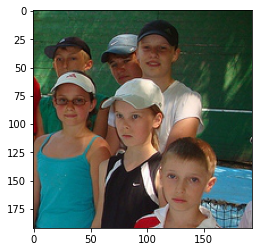

In [3]:
image = tv.io.image.read_image('data/3.jpg')
plt.imshow(image.numpy().transpose([1, 2, 0]))

In [4]:
scores, boxes = detector(image[None])

In [5]:
filter = DetectResult(FaceDetectionFullRange.NUM_CLASSES, FaceDetectionFullRange.NUM_COORDS, 0.5, 0.3)
scores, boxes = filter(scores, boxes)

scores = scores.cpu().detach().numpy()
boxes = boxes.cpu().detach().numpy() * 192
print(scores)
print(boxes)

[[0.9288912 ]
 [0.90418005]
 [0.88897085]
 [0.86854666]
 [0.81183654]
 [0.7053859 ]]
[[131.86447  156.84679   42.77603   42.773804 122.28854  149.04074
  141.36548  152.06464  129.80652  161.65198  128.8969   168.55711
  112.09669  148.70667  152.24634  154.3655  ]
 [107.44241   41.428364  33.10589   33.104263 100.27765   34.37619
  114.46076   35.3236   106.231224  41.62222  106.285835  48.392967
   93.010185  38.754677 123.34028   40.44223 ]
 [ 83.64783  101.6082    37.61963   37.617603  76.54009   94.724
   90.577934  96.20018   79.52784  104.80594   80.77476  111.02205
   74.58814   96.67328  104.72129   99.15099 ]
 [ 33.25762   85.42485   33.716534  33.71416   26.195177  80.328354
   41.181698  81.444016  31.421505  90.2085    32.418194  95.315155
   21.498352  81.741356  53.80591   83.27177 ]
 [ 76.11862   52.409164  25.749714  25.74776   71.20134   49.467445
   80.60753   48.335854  75.01452   56.090958  76.9359    59.923958
   69.82623   49.58106   90.42544   46.043503]
 [ 28.9

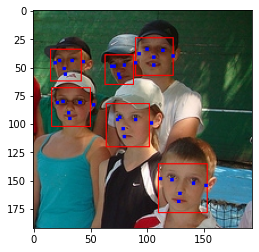

In [6]:
cv_img = cv.imread('data/3.jpg')
for box in boxes:
    box, points = box[:4].reshape([2, 2]), box[4:].reshape([-1, 2])
    lt = box[0] - box[1] / 2
    rb = box[0] + box[1] / 2
    cv_img = cv.rectangle(cv_img, lt.astype('int32'), rb.astype('int32'), color=(0, 0, 255), thickness=1)
    for pts in points:
        cv_img = cv.drawMarker(cv_img, pts.astype('int32'), (255, 0, 0), markerType=2, markerSize=3)
# convert BGR to RGB
plt.figure()
plt.imshow(cv_img[..., ::-1])
plt.show()